In [1]:
# packages and dependencies import
import pandas as pd
import seaborn as sns # Used for Exploratory Data Analysis
import numpy as np
import matplotlib
from pandas import DataFrame

# matplotlib.use('TkAgg')  # or 'QtAgg' if PyQt is installed {pip install PyQt6}
import matplotlib.pyplot as plt

In [2]:
#Data Import 
data: DataFrame = pd.read_csv("/home/tjselevani/PycharmProjects/PythonProject/data/last-3-months-transactions.csv")

In [3]:
data.head()

,vehicle_booked,amount,payment_status,transaction_type,created_at
0,SM192,100,3,CREDIT,2024-12-01 05:49:02.000000
1,SM192,50,2,CREDIT,2024-12-01 05:49:25.000000
2,SM192,100,2,CREDIT,2024-12-01 05:52:20.000000
3,SM944,200,2,CREDIT,2024-12-01 07:18:07.000000
4,SM055,80,2,CREDIT,2024-12-01 07:43:04.000000


In [4]:
data.tail()

,vehicle_booked,amount,payment_status,transaction_type,created_at
9103,SM055,80,2,CREDIT,2025-03-11 18:38:30.000000
9104,SM055,80,3,CREDIT,2025-03-11 18:39:51.000000
9105,SM055,80,2,CREDIT,2025-03-11 18:41:19.000000
9106,SM944,70,3,CREDIT,2025-03-11 19:48:21.000000
9107,SM055,-2620,2,DEBIT,2025-03-11 19:52:04.000000


In [5]:
data.shape

(9108, 5)

In [6]:
data.columns

Index(['vehicle_booked', 'amount', 'payment_status', 'transaction_type',
       'created_at'],
      dtype='object')

In [7]:
data.describe()

,amount,payment_status
count,9.108000e+03,9108.000000
mean,7.803261e+04,2.145696
std,7.444778e+06,0.353753
min,-2.880000e+04,0.000000
25%,5.000000e+01,2.000000
50%,8.000000e+01,2.000000
75%,1.200000e+02,2.000000
max,7.104987e+08,3.000000


In [8]:
data.isnull().sum()

vehicle_booked      0
amount              0
payment_status      0
transaction_type    0
created_at          0
dtype: int64

In [9]:
#Data Visualization

In [10]:
# Global variables for filtering
# Example: Select multiple vehicles (or set to None for all vehicles)
VEHICLE_BOOKED = "SM192"  # or None for all
TRANSACTION_TYPE = "CREDIT"

In [11]:
# Filter data for the specific vehicle "sm191"
if VEHICLE_BOOKED is None:
    vehicle_data = data[data['transaction_type'] == TRANSACTION_TYPE].copy()
else:
    vehicle_data = data[(data['vehicle_booked'] == VEHICLE_BOOKED) & 
                        (data['transaction_type'] == TRANSACTION_TYPE)].copy()

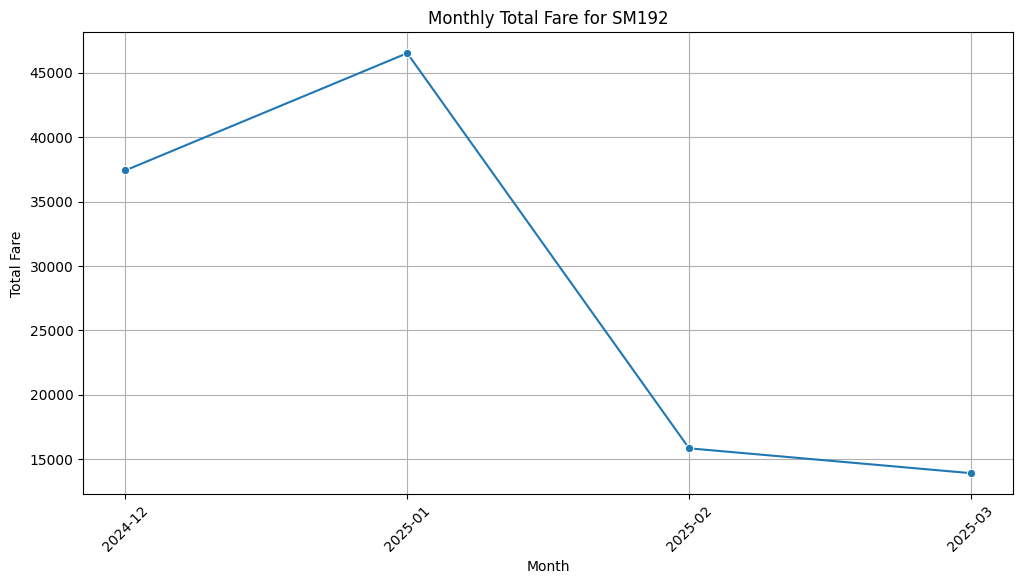

/tmp/ipykernel_86789/1135576785.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='week', y='amount', data=weekly_fares, palette="Blues")


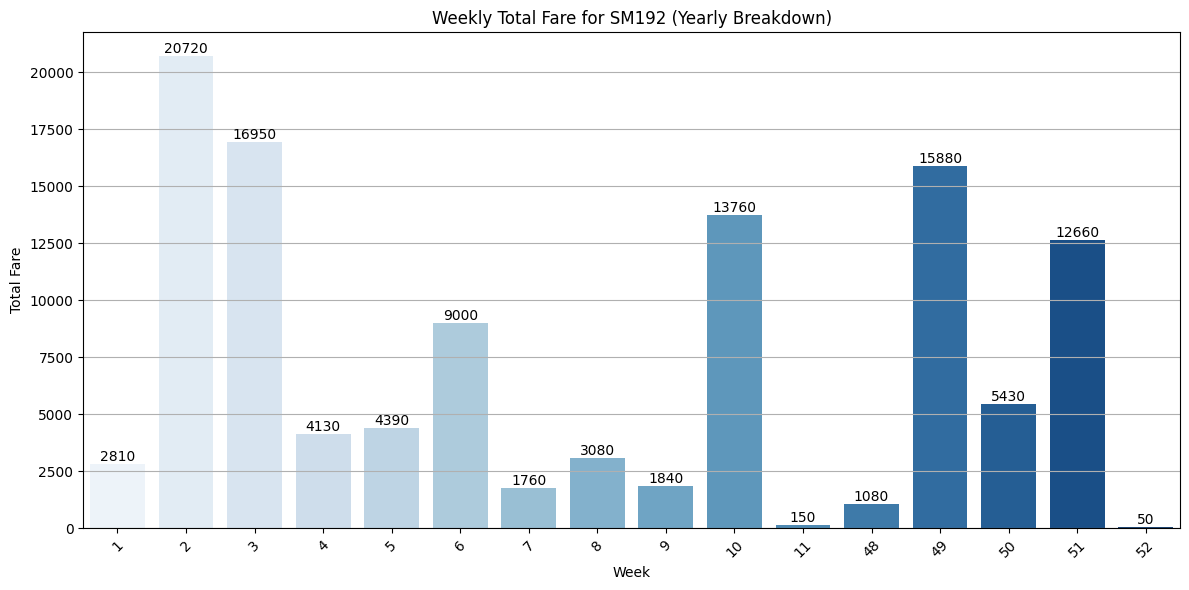

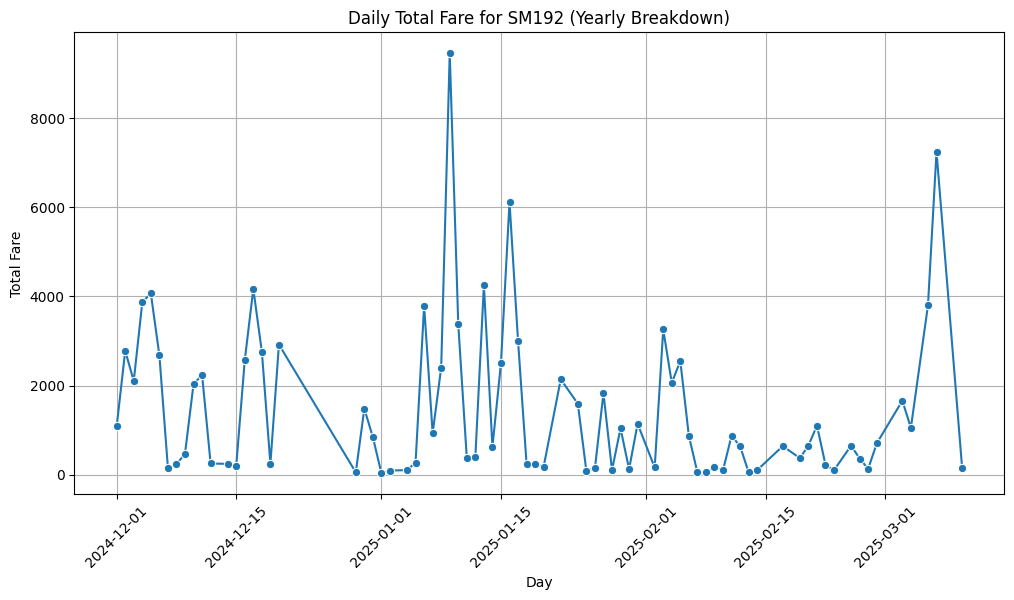

In [14]:
# Convert 'created_at' column to datetime if not already
vehicle_data['created_at'] = pd.to_datetime(vehicle_data['created_at'])

# Extract year, month, week, and day
vehicle_data['year'] = vehicle_data['created_at'].dt.year
vehicle_data['month'] = vehicle_data['created_at'].dt.to_period('M').astype(str)
vehicle_data['week'] = vehicle_data['created_at'].dt.isocalendar().week
vehicle_data['day'] = vehicle_data['created_at'].dt.date

# Aggregate by month, week, and day
monthly_fares = vehicle_data.groupby('month')['amount'].sum().reset_index()
weekly_fares = vehicle_data.groupby('week')['amount'].sum().reset_index()
daily_fares = vehicle_data.groupby('day')['amount'].sum().reset_index()

# Line graph for monthly totals
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='amount', data=monthly_fares, marker='o')

plt.title(f"Monthly Total Fare for {VEHICLE_BOOKED}")
plt.xlabel("Month")
plt.ylabel("Total Fare")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Bar graph for weekly totals
plt.figure(figsize=(12, 6))
sns.barplot(x='week', y='amount', data=weekly_fares, palette="Blues")

plt.title(f"Weekly Total Fare for {VEHICLE_BOOKED} (Yearly Breakdown)")
plt.xlabel("Week")
plt.ylabel("Total Fare")
plt.xticks(rotation=45)
plt.grid(axis='y')

# Add annotations for each bar
for i, amount in enumerate(weekly_fares['amount']):
    plt.text(i, amount, f"{amount}", ha='center', va='bottom')

plt.tight_layout()  # Adjust layout so annotations fit

plt.show()

# Line graph for daily totals
plt.figure(figsize=(12, 6))
sns.lineplot(x='day', y='amount', data=daily_fares, marker='o')

plt.title(f"Daily Total Fare for {VEHICLE_BOOKED} (Yearly Breakdown)")
plt.xlabel("Day")
plt.ylabel("Total Fare")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
